In [19]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [20]:
#loading dataset
wine = load_wine()

In [21]:
print(wine.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [22]:
print(wine.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [23]:
X = pd.DataFrame(wine.data, columns = wine.feature_names)
Y = pd.DataFrame(wine.target, columns = ['target'])

In [24]:
#Normalizing X; Y is already only 3 distinct values
X = (X - X.min()) / (X.max() - X.min())

In [25]:
##splitting the dataset into Train and Test
##not required in KNN, because we are doing this to understand 
##if we can predict for new values that do not already exist in the data

In [26]:
xtrain, testx, ytrain, testy = train_test_split(X, Y, test_size = 0.3)

In [27]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [28]:
f1 = "proline"
f2 = "hue"
f3 = "ash"
f4 = "alcohol"
basex = np.array(xtrain[[f1, f2 ,f3, f4]])
basey = np.array(ytrain['target'])

xtest = np.array(testx[[f1, f2, f3, f4]])
ytest = np.array(testy['target'])

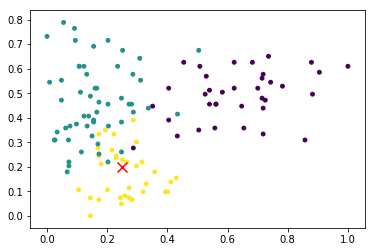

In [29]:
x = pd.DataFrame(basex)
y = basey

plt.scatter(x.iloc[ :, 0], x.iloc[ :, 1], c = y, s = 15)
plt.scatter(0.25, 0.2, c = 'red', marker = 'x', s = 100)

In [30]:
#calculate Distance between any two given points
def euclid_distance(train_point, given_point):
    distance = np.sum((train_point - given_point) ** 2)
    return np.sqrt(distance)

In [31]:
#calculate distance from a given point to all other points
#and keep track of the respective classes for those distances
#and eventually return sorted list of distances
def calc_distance_from_all(all_points, given_point, predictions):
    all_distances = []
    for i, each in enumerate(all_points):
        distance = euclid_distance(each, given_point)
        all_distances.append((distance, int(predictions[i])))
    all_distances.sort(key=lambda tup: tup[0])
    return all_distances

In [32]:
#get the defined neighbours from a list of sorted distances
def get_neighbours(distances, count):
    return distances[ :count]

In [33]:
#takes a given point and predicts the class based on all other points
def predict(all_points, given_point, predictions):
    distances = calc_distance_from_all(all_points, given_point, predictions)
    neighbours = get_neighbours(distances, 4)
    
    op = [row[-1] for row in neighbours]
    prediction = max(set(op), key = op.count)
    return prediction

In [34]:
#get how accurate our system is based on a new set of points
#for which we already know the right answer to
def accuracy(basex, basey, xtest, ytest):
    correct = 0
    
    for i in range(len(xtest)):
        p = predict(basex, xtest[i], basey)
        if p == ytest[i]:
            correct += 1 
            
    return f"Accuracy: {correct * 100 / len(ytest)} % "    

In [35]:
print(accuracy(basex, basey, xtest, ytest))

Accuracy: 94.44444444444444 % 
